<a href="https://colab.research.google.com/github/pszjmb1/0FunWithColab/blob/master/timeseriesLstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Time Series Forecasting with the Long Short-Term Memory Network in Python
by Jason Brownlee 

Based on https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/ and https://machinelearningmastery.com/implement-baseline-machine-learning-algorithms-scratch-python/

In [0]:
# Load libraries
from matplotlib import pyplot
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

# Download and load data
This dataset describes the monthly number of shampoo sales over a 3 year period.

The units are a sales count and there are 36 observations. The original dataset is credited to Makridakis, Wheelwright, and Hyndman (1998).

In [0]:
dataLocation = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv"
# load dataset
def parser(x):
	return pd.datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv(dataLocation, header=0, parse_dates=[0], index_col=0, 
                  squeeze=True, date_parser=parser)

# Summarize and plot first few rows


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


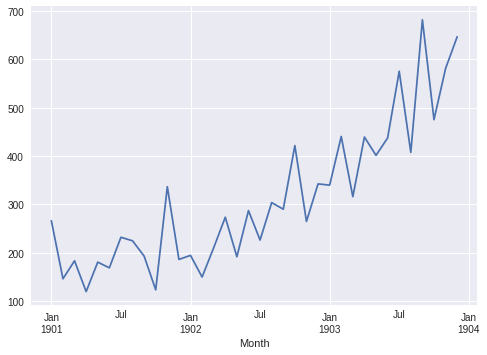

In [3]:
print(series.head())
# line plot
series.plot()
pyplot.show()

# Split data into train and test

In [0]:
X = series.values
train, test = X[0:-12], X[-12:]

# Baseline Predictions

A baseline in forecast performance provides a point of comparison.

It is a point of reference for all other modeling techniques on your problem. If a model achieves performance at or below the baseline, the technique should be fixed or abandoned.

The technique used to generate a forecast to calculate the baseline performance must be easy to implement and naive of problem-specific details.

The goal is to get a baseline performance on your time series forecast problem as quickly as possible so that you can get to work better understanding the dataset and developing more advanced models.

Three properties of a good technique for making a baseline forecast are:
 - Simple: A method that requires little or no training or intelligence.
 - Fast: A method that is fast to implement and computationally trivial to make a prediction.
 - Repeatable: A method that is deterministic, meaning that it produces an expected output given the same input.

## Persistence Forecast
A good baseline forecast for a time series with a linear increasing trend is a persistence forecast.

The persistence algorithm uses the value at the previous time step (t-1) to predict the expected outcome at the next time step (t+1).
- This satisfies the three above conditions for a baseline forecast

We can implement this by taking the last observation from the training data and history accumulated by walk-forward validation and using that to predict the current time step.

### Walk-forward validation

In [0]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])

## Baseline performance on test set

In [6]:
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 136.761


RMSE of about 136 monthly shampoo sales for the forecasts on the test dataset.

## Plot of observed vs naive forecast

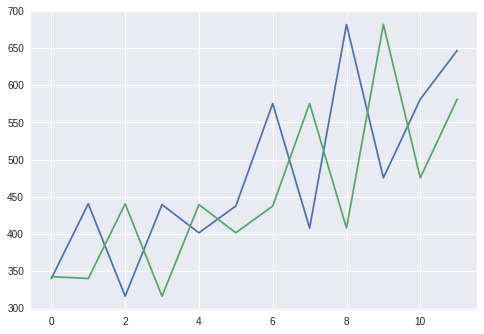

In [7]:
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

A line plot of the test dataset (blue) compared to the predicted values (green) shows the persistence model forecast in context.